In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('hacktrain.csv')

In [4]:
df

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.880,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.950,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.000,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10537,10538,impervious,1207.7000,984.620,NaN,1166.25,937.478,1072.700,823.896,...,1117.740,1176.600,1044.110,NaN,369.082,465.843,362.882,979.795,NaN,433.659
7996,10538,10539,impervious,2170.3500,1419.720,1361.000,1478.71,983.911,1262.110,1422.860,...,984.634,2128.970,1379.660,NaN,762.633,485.204,446.724,771.747,1589.06,506.936
7997,10541,10542,impervious,1895.6800,1454.740,NaN,1033.56,1930.380,1057.150,1471.600,...,888.408,2093.020,1232.110,1190.830,1441.460,1170.880,1095.000,1818.650,2501.72,1247.770
7998,10542,10543,impervious,3465.7400,1283.320,413.412,4391.05,1146.820,4473.050,1614.750,...,5833.760,4047.320,4515.800,433.177,277.296,744.143,NaN,3759.710,NaN,388.346


In [5]:
df.shape

(8000, 30)

In [6]:
df.isna().sum()

Unnamed: 0       0
ID               0
class            0
20150720_N     560
20150602_N    1200
20150517_N     800
20150501_N     960
20150415_N     480
20150330_N    1120
20150314_N     720
20150226_N    1360
20150210_N     640
20150125_N    1040
20150109_N     880
20141117_N    1280
20141101_N     400
20141016_N    1440
20140930_N     800
20140813_N     560
20140626_N    1600
20140610_N     480
20140525_N     720
20140509_N     880
20140423_N    1760
20140407_N     640
20140322_N    1120
20140218_N    1440
20140202_N     560
20140117_N    1200
20140101_N     400
dtype: int64

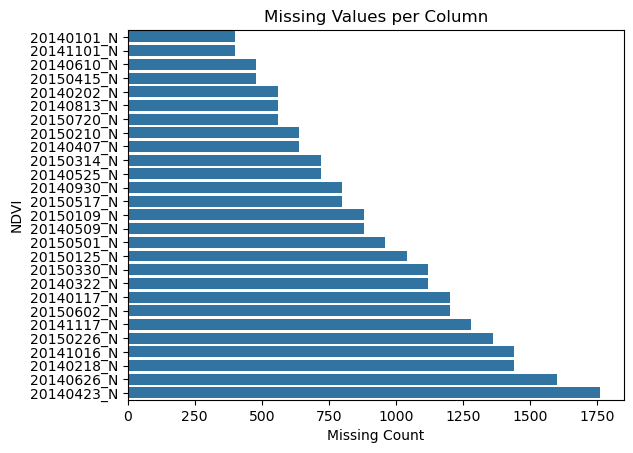

In [7]:
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values()
sns.barplot(x=missing_counts.values, y=missing_counts.index)
plt.xlabel('Missing Count')
plt.ylabel('NDVI')
plt.title('Missing Values per Column')
plt.show()

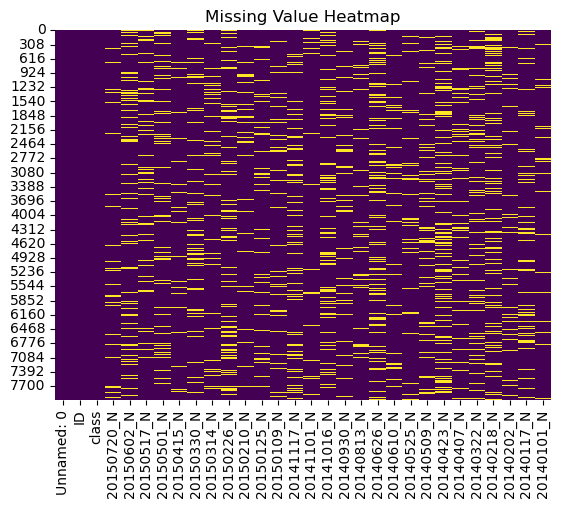

In [8]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

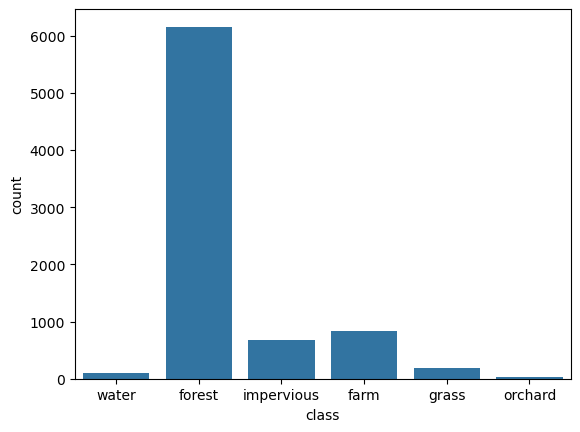

In [9]:
sns.countplot(x=df['class'])
plt.show()

In [10]:
missing_percent = df.isnull().mean().sort_values(ascending=False)
print(missing_percent)

20140423_N    0.22
20140626_N    0.20
20140218_N    0.18
20141016_N    0.18
20150226_N    0.17
20141117_N    0.16
20140117_N    0.15
20150602_N    0.15
20140322_N    0.14
20150330_N    0.14
20150125_N    0.13
20150501_N    0.12
20140509_N    0.11
20150109_N    0.11
20140930_N    0.10
20150517_N    0.10
20150314_N    0.09
20140525_N    0.09
20150210_N    0.08
20140407_N    0.08
20140202_N    0.07
20140813_N    0.07
20150720_N    0.07
20150415_N    0.06
20140610_N    0.06
20141101_N    0.05
20140101_N    0.05
ID            0.00
class         0.00
Unnamed: 0    0.00
dtype: float64


In [11]:
from sklearn.impute import KNNImputer

ndvi_cols = [col for col in df.columns if '_N' in col]  
imputer = KNNImputer(n_neighbors=5)
df[ndvi_cols] = imputer.fit_transform(df[ndvi_cols])

In [12]:
import pandas as pd
import numpy as np

ndvi_cols = [col for col in df.columns if col.endswith('_N')]

df['NDVI_Mean'] = df[ndvi_cols].mean(axis=1)
df['NDVI_Std'] = df[ndvi_cols].std(axis=1)
df['NDVI_Max'] = df[ndvi_cols].max(axis=1)
df['NDVI_Min'] = df[ndvi_cols].min(axis=1)
df['NDVI_Range'] = df['NDVI_Max'] - df['NDVI_Min']
df['NDVI_Slope'] = df[ndvi_cols].apply(lambda row: np.polyfit(range(len(row)), row, 1)[0], axis=1)

In [13]:
df

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140218_N,20140202_N,20140117_N,20140101_N,NDVI_Mean,NDVI_Std,NDVI_Max,NDVI_Min,NDVI_Range,NDVI_Slope
0,0,1,water,637.5950,658.6680,-1882.0300,-1924.36,997.9040,-1739.990000,630.0870,...,211.3280,-2203.020,-1180.1900,433.906,-289.617800,1021.810029,997.904,-2203.020,3200.924,-4.137206
1,1,2,water,634.2400,593.7050,-1625.7900,-1672.32,914.1980,-692.386000,707.6260,...,220.8780,-2250.000,-1360.5600,524.075,-265.294041,937.584446,914.198,-2250.000,3164.198,-0.715194
2,3,4,water,58.0174,-1599.1600,144.9534,-1052.63,507.2934,-1564.630000,-893.6636,...,369.2140,-2202.120,-194.0048,-1343.550,-425.729526,1062.100063,952.178,-3162.140,4114.318,1.919838
3,4,5,water,72.5180,-1111.1074,380.4360,-1256.93,515.8050,-1413.180000,-802.9420,...,298.3200,-2197.360,-194.0048,-826.727,-360.520178,1027.424944,1232.120,-2829.400,4061.520,-0.720414
4,7,8,water,1136.4400,1241.3652,64.1232,1647.83,1935.8000,886.658792,2158.9800,...,1660.6500,-116.801,-568.0500,-1357.140,620.793629,1178.373902,2158.980,-2646.050,4805.030,-39.029263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10537,10538,impervious,1207.7000,984.6200,981.2324,1166.25,937.4780,1072.700000,823.8960,...,362.8820,979.795,389.4354,433.659,893.009378,318.019937,1589.000,362.882,1226.118,-19.907386
7996,10538,10539,impervious,2170.3500,1419.7200,1361.0000,1478.71,983.9110,1262.110000,1422.8600,...,446.7240,771.747,1589.0600,506.936,1246.102296,547.213871,2178.670,336.289,1842.381,-26.681218
7997,10541,10542,impervious,1895.6800,1454.7400,1440.4628,1033.56,1930.3800,1057.150000,1471.6000,...,1095.0000,1818.650,2501.7200,1247.770,1555.141607,603.601622,2780.930,447.868,2333.062,-4.565022
7998,10542,10543,impervious,3465.7400,1283.3200,413.4120,4391.05,1146.8200,4473.050000,1614.7500,...,382.9458,3759.710,2139.8380,388.346,2244.188141,1662.389385,5833.760,244.594,5589.166,-19.588692


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import RobustScaler,LabelEncoder,PolynomialFeatures
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

In [15]:
df.drop(columns = ['ID','Unnamed: 0'],inplace = True)

In [16]:
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

In [17]:
X = df.drop(columns = ['class'])
y = df['class']

In [18]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
X_train , X_test , y_train , y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial'), 
                    param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000,
                                          multi_class='multinomial'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='accuracy')

In [21]:
y_pred = grid.predict(X_test)

In [22]:
print("Best C:", grid.best_params_)

Best C: {'C': 1}


In [23]:
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=0))

              precision    recall  f1-score   support

        farm       0.77      0.61      0.68       168
      forest       0.94      0.98      0.96      1232
       grass       0.85      0.56      0.68        39
  impervious       0.83      0.87      0.85       134
     orchard       1.00      0.17      0.29         6
       water       0.87      0.62      0.72        21

    accuracy                           0.91      1600
   macro avg       0.88      0.63      0.70      1600
weighted avg       0.91      0.91      0.91      1600



In [24]:
from sklearn.model_selection import cross_val_score
cross_val_score(grid, X_scaled, y, cv=5, scoring='accuracy').mean()

0.908625

<Axes: >

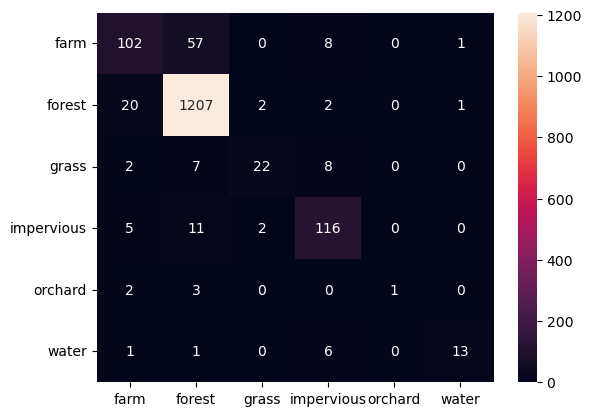

In [25]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

In [26]:
test_data = pd.read_csv('hacktest.csv')
test_data.shape

(2845, 29)

In [27]:
test_data.head()

,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,7466.42,413.162,5761.00,5625.45,489.403,3923.84,3097.110,6766.42,...,801.184,927.115,4704.14,6378.42,340.949,2695.570,527.268,4736.75,601.843,6639.760
1,1,2,7235.26,6037.350,1027.56,6085.14,1618.050,6668.54,2513.990,1051.69,...,5533.470,5103.040,5216.12,4885.27,4366.790,1234.140,3298.110,6942.68,1070.440,842.101
2,2,3,7425.08,6969.980,1177.94,7408.93,861.061,7644.43,814.458,1504.29,...,1981.390,6204.540,7021.69,5704.41,4897.450,1789.990,2206.100,6928.93,1036.560,831.441
3,3,4,7119.12,1731.620,6311.93,6441.61,465.979,7128.42,1649.120,6935.22,...,959.344,5794.150,1045.57,5572.90,586.287,685.906,1287.000,6734.72,824.584,6883.610
4,4,5,7519.55,8130.260,1482.54,7879.53,1001.210,7937.60,4122.530,1094.51,...,7636.070,6996.760,7413.43,4596.13,4511.700,1413.520,3283.940,7937.68,1857.800,1336.920


In [28]:
test_data_cleaned = test_data.drop(columns=['ID', 'Unnamed: 0'])

In [29]:
ndvi_cols = [col for col in test_data.columns if '_N' in col]

In [30]:
test_data_cleaned

,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,7466.4200,413.162,5761.000,5625.45,489.4030,3923.84,3097.110,6766.42000,2829.130,6742.570,...,801.184,927.115,4704.14,6378.42,340.949,2695.5700,527.268,4736.75,601.843,6639.760
1,7235.2600,6037.350,1027.560,6085.14,1618.0500,6668.54,2513.990,1051.69000,7268.220,6908.180,...,5533.470,5103.040,5216.12,4885.27,4366.790,1234.1400,3298.110,6942.68,1070.440,842.101
2,7425.0800,6969.980,1177.940,7408.93,861.0610,7644.43,814.458,1504.29000,7002.630,6086.560,...,1981.390,6204.540,7021.69,5704.41,4897.450,1789.9900,2206.100,6928.93,1036.560,831.441
3,7119.1200,1731.620,6311.930,6441.61,465.9790,7128.42,1649.120,6935.22000,2176.800,690.408,...,959.344,5794.150,1045.57,5572.90,586.287,685.9060,1287.000,6734.72,824.584,6883.610
4,7519.5500,8130.260,1482.540,7879.53,1001.2100,7937.60,4122.530,1094.51000,7951.440,8001.350,...,7636.070,6996.760,7413.43,4596.13,4511.700,1413.5200,3283.940,7937.68,1857.800,1336.920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,-1673.7400,-2514.480,-2451.190,-2738.44,64.4464,-2275.03,-2881.100,-4738.97000,-4293.570,-4402.210,...,-2257.890,-2582.420,-1699.10,-2295.30,306.483,209.4030,221.920,-4885.15,-2630.590,356.233
2841,-96.8233,-412.727,-1795.400,-2363.82,-2168.1900,-2162.68,-3155.740,-4416.11000,-5648.660,-5193.280,...,-3991.910,-2614.910,-2109.84,-2687.18,-2853.890,71.3402,-86.414,-5109.01,324.637,-4316.580
2842,-2364.6000,-155.592,-1422.090,-1713.40,465.6220,-2230.40,-3088.730,-5010.32000,-4211.420,-3354.430,...,-2484.500,-1756.080,-3820.43,-1988.23,433.852,291.8000,254.548,-4259.30,412.115,-1170.750
2843,-3004.6300,-1217.120,180.122,-1113.89,438.4180,-2442.51,-3210.560,-3237.74000,-192.857,-2857.540,...,-3291.490,-2018.450,-3472.65,-3109.07,511.792,369.0970,276.948,-5574.51,298.739,460.419


In [31]:
test_data_cleaned['NDVI_Mean'] = test_data_cleaned[ndvi_cols].mean(axis=1)
test_data_cleaned['NDVI_Std'] = test_data_cleaned[ndvi_cols].std(axis=1)
test_data_cleaned['NDVI_Max'] = test_data_cleaned[ndvi_cols].max(axis=1)
test_data_cleaned['NDVI_Min'] = test_data_cleaned[ndvi_cols].min(axis=1)
test_data_cleaned['NDVI_Range'] = test_data_cleaned['NDVI_Max'] - test_data_cleaned['NDVI_Min']
test_data_cleaned['NDVI_Slope'] = test_data_cleaned[ndvi_cols].apply(lambda row: np.polyfit(range(len(row)), row, 1)[0], axis=1)

In [32]:
test_data_cleaned

,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,20140218_N,20140202_N,20140117_N,20140101_N,NDVI_Mean,NDVI_Std,NDVI_Max,NDVI_Min,NDVI_Range,NDVI_Slope
0,7466.4200,413.162,5761.000,5625.45,489.4030,3923.84,3097.110,6766.42000,2829.130,6742.570,...,527.268,4736.75,601.843,6639.760,3343.529778,2477.036970,7466.420,340.949,7125.471,-58.403572
1,7235.2600,6037.350,1027.560,6085.14,1618.0500,6668.54,2513.990,1051.69000,7268.220,6908.180,...,3298.110,6942.68,1070.440,842.101,3750.664704,2514.860621,7425.840,535.296,6890.544,-68.965761
2,7425.0800,6969.980,1177.940,7408.93,861.0610,7644.43,814.458,1504.29000,7002.630,6086.560,...,2206.100,6928.93,1036.560,831.441,3790.384667,2807.079716,7644.430,522.798,7121.632,-73.940891
3,7119.1200,1731.620,6311.930,6441.61,465.9790,7128.42,1649.120,6935.22000,2176.800,690.408,...,1287.000,6734.72,824.584,6883.610,3242.310704,2627.535640,7128.420,465.979,6662.441,-49.364616
4,7519.5500,8130.260,1482.540,7879.53,1001.2100,7937.60,4122.530,1094.51000,7951.440,8001.350,...,3283.940,7937.68,1857.800,1336.920,4468.600704,2980.248232,8130.260,550.508,7579.752,-78.656631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,-1673.7400,-2514.480,-2451.190,-2738.44,64.4464,-2275.03,-2881.100,-4738.97000,-4293.570,-4402.210,...,221.920,-4885.15,-2630.590,356.233,-1997.699207,1786.044716,491.678,-5611.400,6103.078,63.221354
2841,-96.8233,-412.727,-1795.400,-2363.82,-2168.1900,-2162.68,-3155.740,-4416.11000,-5648.660,-5193.280,...,-86.414,-5109.01,324.637,-4316.580,-2318.400781,1984.884216,556.093,-5648.660,6204.753,8.944875
2842,-2364.6000,-155.592,-1422.090,-1713.40,465.6220,-2230.40,-3088.730,-5010.32000,-4211.420,-3354.430,...,254.548,-4259.30,412.115,-1170.750,-1640.061593,1724.990648,987.461,-5010.320,5997.781,41.066144
2843,-3004.6300,-1217.120,180.122,-1113.89,438.4180,-2442.51,-3210.560,-3237.74000,-192.857,-2857.540,...,276.948,-5574.51,298.739,460.419,-1170.447741,1782.525273,973.953,-5574.510,6548.463,19.546456


In [33]:
test_data_scaled = scaler.transform(test_data_cleaned)

In [34]:
y_test_pred = grid.predict(test_data_scaled)

In [35]:
y_decoded = label_encoder.inverse_transform(y_test_pred)

In [36]:
result = pd.DataFrame({
    'ID': test_data['ID'],
    'class': y_decoded
})

In [37]:
result

,ID,class
0,1,forest
1,2,orchard
2,3,orchard
3,4,forest
4,5,orchard
...,...,...
2840,2841,water
2841,2842,water
2842,2843,water
2843,2844,water


In [38]:
result.to_csv("submission.csv", index=False) 